# 1. Pick a website and describe your objective

# Project Overview

- We are going to scrape movie information from https://www.themoviedb.org/movie 
- We'll get the movie list in Popularity descending order
- We'll filter the first 20 movies
- For each Movie we get data like- title, genre, release date, duration, ratings, cast, director, budget, etc
- This data will be stored in a csv file

# 2. Use the requests library to download web pages

In [1]:
!pip install requests

In [2]:
import requests

In [3]:
movie_url = 'https://www.themoviedb.org/movie'
response = requests.get(movie_url)

In [4]:
response.status_code

200

In [5]:
len(response.text)

215634

In [6]:
page_contents = response.text

In [7]:
page_contents[:500]

'<!DOCTYPE html>\n<html lang="ae" class="no-js">\n  <head>\n    <title>Popular Movies &#8212; The Movie Database (TMDB)</title>\n    <meta http-equiv="cleartype" content="on">\n    <meta charset="utf-8">\n    <meta name="keywords" content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast">\n    <meta name="mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="viewpo'

In [8]:
with open('webpage.html', 'w') as f:
    f.write(page_contents)

# 3. Use Beautiful Soup to parse and extract information

In [9]:
!pip install beautifulsoup4 --upgrade --quiet

In [10]:
from bs4 import BeautifulSoup

In [11]:
doc = BeautifulSoup(page_contents, 'html.parser')

In [12]:
doc

<!DOCTYPE html>

<html class="no-js" lang="ae">
<head>
<title>Popular Movies — The Movie Database (TMDB)</title>
<meta content="on" http-equiv="cleartype"/>
<meta charset="utf-8"/>
<meta content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast" name="keywords"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="The Movie Database (TMDB) is a popular, user editable database for movies and TV shows." name="description"/>
<meta content="/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71c69222b72c2f75d26dab1224173a96fecc962.png" name="msapplication-TileImage"/>
<meta content="#032541" name="msapplication-TileColor"/>
<meta content="#032541" name="theme-color"/>
<link href="/assets/2/apple-touch-icon-57ed4b3b0450fd5e9a0c20f34e814b82adaa1085c79bdde2f00ca8787b63d

In [13]:
movie_url = []
movie_tags = doc.find_all('a', title=True)

for i in range(len(movie_tags)):
    if i >= 21 and i <= 60 and i % 2 == 0:
        movie_url.append("https://www.themoviedb.org" + movie_tags[i]['href'])

print(movie_url)

['https://www.themoviedb.org/movie/1022789-inside-out-2', 'https://www.themoviedb.org/movie/786892-furiosa-a-mad-max-saga', 'https://www.themoviedb.org/movie/653346-kingdom-of-the-planet-of-the-apes', 'https://www.themoviedb.org/movie/150540-inside-out', 'https://www.themoviedb.org/movie/573435-bad-boys-ride-or-die', 'https://www.themoviedb.org/movie/1016346-mr-9-do-or-die', 'https://www.themoviedb.org/movie/1001311-sous-la-seine', 'https://www.themoviedb.org/movie/823464-godzilla-x-kong-the-new-empire', 'https://www.themoviedb.org/movie/929590-civil-war', 'https://www.themoviedb.org/movie/639720-if', 'https://www.themoviedb.org/movie/955555-the-roundup-punishment', 'https://www.themoviedb.org/movie/519182-despicable-me-4', 'https://www.themoviedb.org/movie/1115623-the-last-kumite', 'https://www.themoviedb.org/movie/704673-trigger-warning', 'https://www.themoviedb.org/movie/1011985-kung-fu-panda-4', 'https://www.themoviedb.org/movie/762441-a-quiet-place-day-one', 'https://www.themovied

In [14]:
movie_tags[22].text

'Inside Out 2'

In [15]:

# Lists to store movie information
movie_titles = []
movie_desc = []
movie_ratings = []
movie_casts = []
movie_directors = []
movie_genres = []
movie_durations = []
movie_release_dates = []

# Fetch and parse each movie page
for i, m_url in enumerate(movie_url):
    r = requests.get(m_url)
    movie_page_contents = r.text
    
    # Save the HTML content to a file
    with open(f'moviepage_{i+1}.html', 'w', encoding='utf-8') as f:
        f.write(movie_page_contents)
    
    # Parse the HTML content with BeautifulSoup
    movie_doc = BeautifulSoup(movie_page_contents, 'html.parser')
    
    # Extract the movie title
    title_tag = movie_doc.find('meta', property='og:title')
    if title_tag and title_tag.has_attr('content'):
        movie_titles.append(title_tag['content'])
    else:
        movie_titles.append("Title not found")
    
    # Extract the movie description
    description_tag = movie_doc.find('meta', property='og:description')
    if description_tag and description_tag.has_attr('content'):
        movie_desc.append(description_tag['content'])
    else:
        movie_desc.append("Description not found")
    
    # Extract the movie rating
    rating_tag = movie_doc.find('div', class_='user_score_chart')
    if rating_tag and rating_tag.has_attr('data-percent'):
        movie_ratings.append(rating_tag['data-percent'])
    else:
        movie_ratings.append("Rating not found")
    
    # Extract the movie cast
    cast_tags = movie_doc.select('ol.people.scroller > li > p > a')
    if cast_tags:
        cast_list = [tag.get_text().strip() for tag in cast_tags]
        movie_casts.append(', '.join(cast_list))
    else:
        movie_casts.append("Cast not found")
    
    # Extract the movie director
    director_tag = movie_doc.find('li', class_='profile')
    if director_tag:
        director = director_tag.find_next('a').get_text()
        movie_directors.append(director)
    else:
        movie_directors.append("Director not found")
    
    # Extract the movie genre
    genre_tags = movie_doc.select('span.genres > a')
    if genre_tags:
        genre_list = [tag.get_text().strip() for tag in genre_tags]
        movie_genres.append(', '.join(genre_list))
    else:
        movie_genres.append("Genre not found")
    
    # Extract the movie duration
    duration_tag = movie_doc.find('span', class_='runtime')
    if duration_tag:
        movie_durations.append(duration_tag.get_text().strip())
    else:
        movie_durations.append("Duration not found")
    
    # Extract the movie release date
    release_date_tag = movie_doc.find('span', class_='release_date')
    if release_date_tag:
        movie_release_dates.append(release_date_tag.get_text().strip())
    else:
        movie_release_dates.append("Release date not found")

# Print the lists of movie information
for i in range(len(movie_url)):
    print(f"Movie {i+1}:")
    print(f"Title: {movie_titles[i]}")
    print(f"Description: {movie_desc[i]}")
    print(f"Rating: {movie_ratings[i]}")
    print(f"Cast: {movie_casts[i]}")
    print(f"Director: {movie_directors[i]}")
    print(f"Genre: {movie_genres[i]}")
    print(f"Duration: {movie_durations[i]}")
    print(f"Release Date: {movie_release_dates[i]}")
    print("\n")


Movie 1:
Title: Inside Out 2
Description: Teenager Riley's mind headquarters is undergoing a sudden demolition to make room for something entirely unexpected: new Emotions! Joy, Sadness, Anger, Fear and Disgust, who’ve long been running a successful operation by all accounts, aren’t sure how to feel when Anxiety shows up. And it looks like she’s not alone.
Rating: 77
Cast: Amy Poehler, Maya Hawke, Kensington Tallman, Liza Lapira, Phyllis Smith, Lewis Black, Tony Hale, Ayo Edebiri, Adèle Exarchopoulos, View More
Director: Kelsey Mann
Genre: Animation, Family, Adventure, Comedy
Duration: 1h 37m
Release Date: (2024)


Movie 2:
Title: Furiosa: A Mad Max Saga
Description: As the world fell, young Furiosa is snatched from the Green Place of Many Mothers and falls into the hands of a great Biker Horde led by the Warlord Dementus. Sweeping through the Wasteland they come across the Citadel presided over by The Immortan Joe. While the two Tyrants war for dominance, Furiosa must survive many tri

In [16]:
import pandas as pd

In [17]:
movies_dict = {
    
    'title' : movie_titles,
    'description': movie_desc,
    'rating' : movie_ratings,
    'cast' : movie_casts,
    'director' : movie_directors,
    'genre' : movie_genres,
    'duration' : movie_durations,
    'release_date' : movie_release_dates
}

In [18]:
movies_df = pd.DataFrame(movies_dict)

In [19]:
movies_df

,title,description,rating,cast,director,genre,duration,release_date
0,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,77,"Amy Poehler, Maya Hawke, Kensington Tallman, L...",Kelsey Mann,"Animation, Family, Adventure, Comedy",1h 37m,(2024)
1,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",77,"Anya Taylor-Joy, Chris Hemsworth, Tom Burke, A...",George Miller,"Action, Adventure, Science Fiction",2h 29m,(2024)
2,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,69,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",Rick Jaffa,"Science Fiction, Adventure, Action",2h 25m,(2024)
3,Inside Out,"When 11-year-old Riley moves to a new city, he...",79,"Amy Poehler, Phyllis Smith, Bill Hader, Lewis ...",Pete Docter,"Animation, Family, Adventure, Drama, Comedy",1h 35m,(2015)
4,Bad Boys: Ride or Die,"After their late former Captain is framed, Low...",70,"Will Smith, Martin Lawrence, Vanessa Hudgens, ...",George Gallo,"Action, Crime, Thriller, Comedy",1h 55m,(2024)
5,MR-9: Do or Die,Masud Rana is a Secret Agent with code name MR...,64,"Frank Grillo, Michael Jai White, Kelly Greyson...",Asif Akbar,"Action, Drama, Thriller",2h 4m,(2023)
6,Under Paris,"In the Summer of 2024, Paris is hosting the Wo...",60,"Bérénice Bejo, Nassim Lyes, Léa Léviant, Nagis...",Xavier Gens,"Thriller, Horror, Action, Mystery",1h 44m,(2024)
7,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",72,"Rebecca Hall, Brian Tyree Henry, Dan Stevens, ...",Adam Wingard,"Science Fiction, Action, Adventure",1h 55m,(2024)
8,Civil War,"In the near future, a group of war journalists...",70,"Kirsten Dunst, Wagner Moura, Cailee Spaeny, St...",Alex Garland,"War, Action, Drama",1h 49m,(2024)
9,IF,A young girl who goes through a difficult expe...,75,"Cailey Fleming, Ryan Reynolds, John Krasinski,...",John Krasinski,"Comedy, Fantasy, Family",1h 44m,(2024)


# 4. Performing EDA on dataset

In [31]:
movies_df.head()

,title,description,rating,cast,director,genre,duration,release_date
0,Inside Out 2,Teenager Riley's mind headquarters is undergoi...,77,0,8,8,97,(2024)
1,Furiosa: A Mad Max Saga,"As the world fell, young Furiosa is snatched f...",77,3,5,1,149,(2024)
2,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,69,16,15,17,145,(2024)
3,Inside Out,"When 11-year-old Riley moves to a new city, he...",79,1,14,9,95,(2015)
4,Bad Boys: Ride or Die,"After their late former Captain is framed, Low...",70,19,4,4,115,(2024)


In [32]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         20 non-null     object
 1   description   20 non-null     object
 2   rating        20 non-null     int64 
 3   cast          20 non-null     int8  
 4   director      20 non-null     int8  
 5   genre         20 non-null     int8  
 6   duration      20 non-null     int64 
 7   release_date  20 non-null     object
dtypes: int64(2), int8(3), object(3)
memory usage: 988.0+ bytes


In [33]:
movies_df.isna()

,title,description,rating,cast,director,genre,duration,release_date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [34]:
movies_df.isna().any()

title           False
description     False
rating          False
cast            False
director        False
genre           False
duration        False
release_date    False
dtype: bool

In [35]:
movies_df.nunique()

title           20
description     20
rating          14
cast            20
director        20
genre           20
duration        17
release_date     3
dtype: int64

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

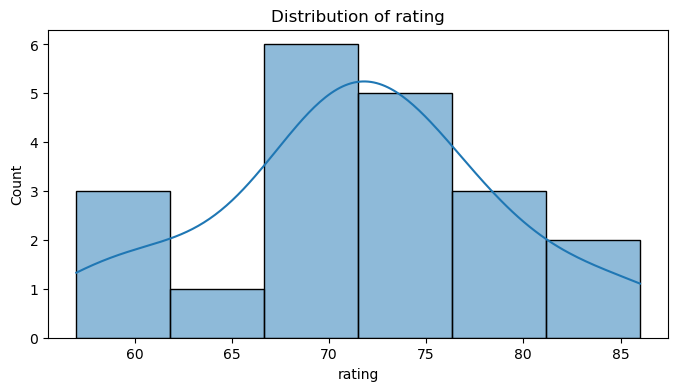

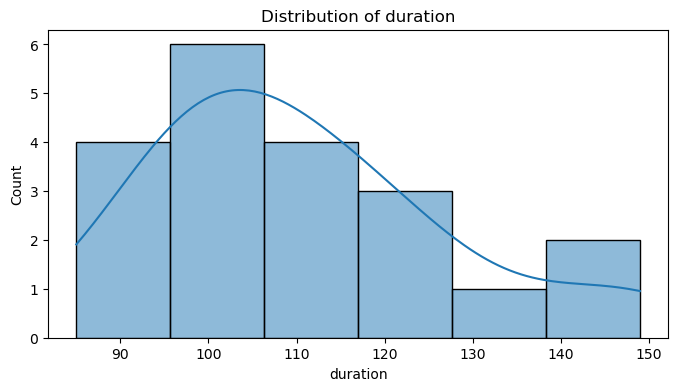

In [37]:
# Distribution of numerical features

numerical_cols = movies_df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=movies_df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

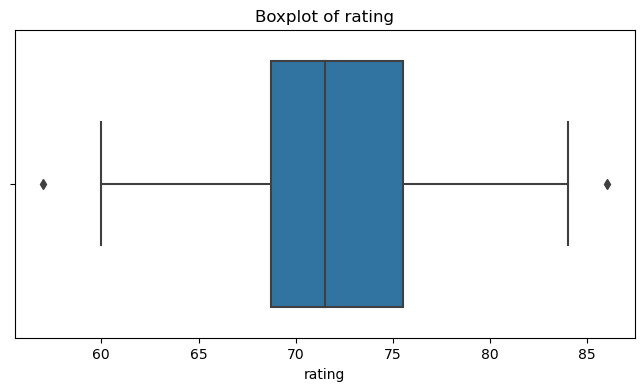

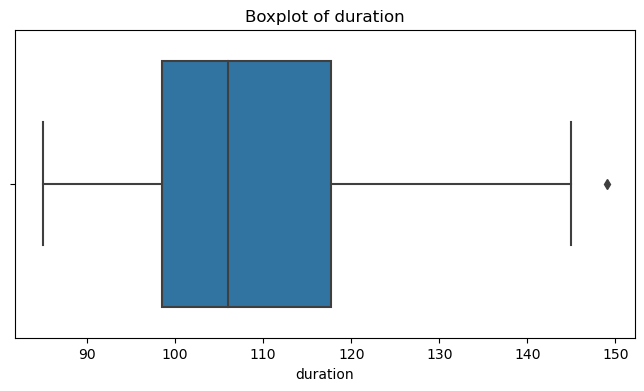

In [38]:
# Boxplots for numerical features

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=movies_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

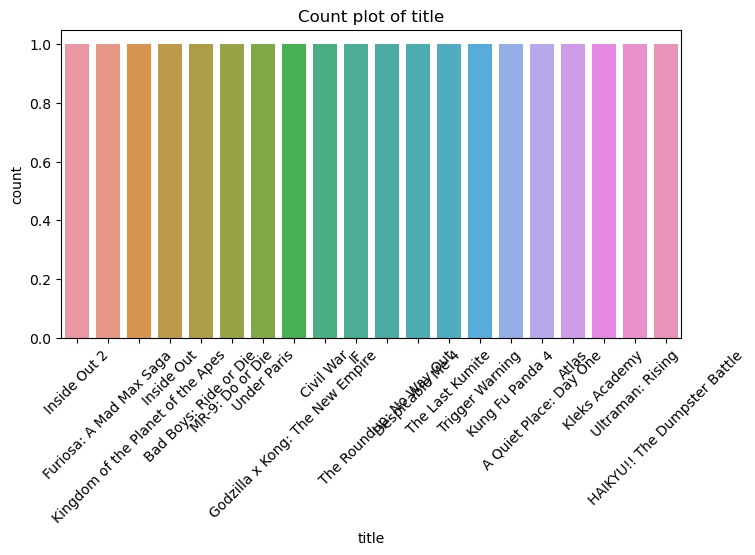

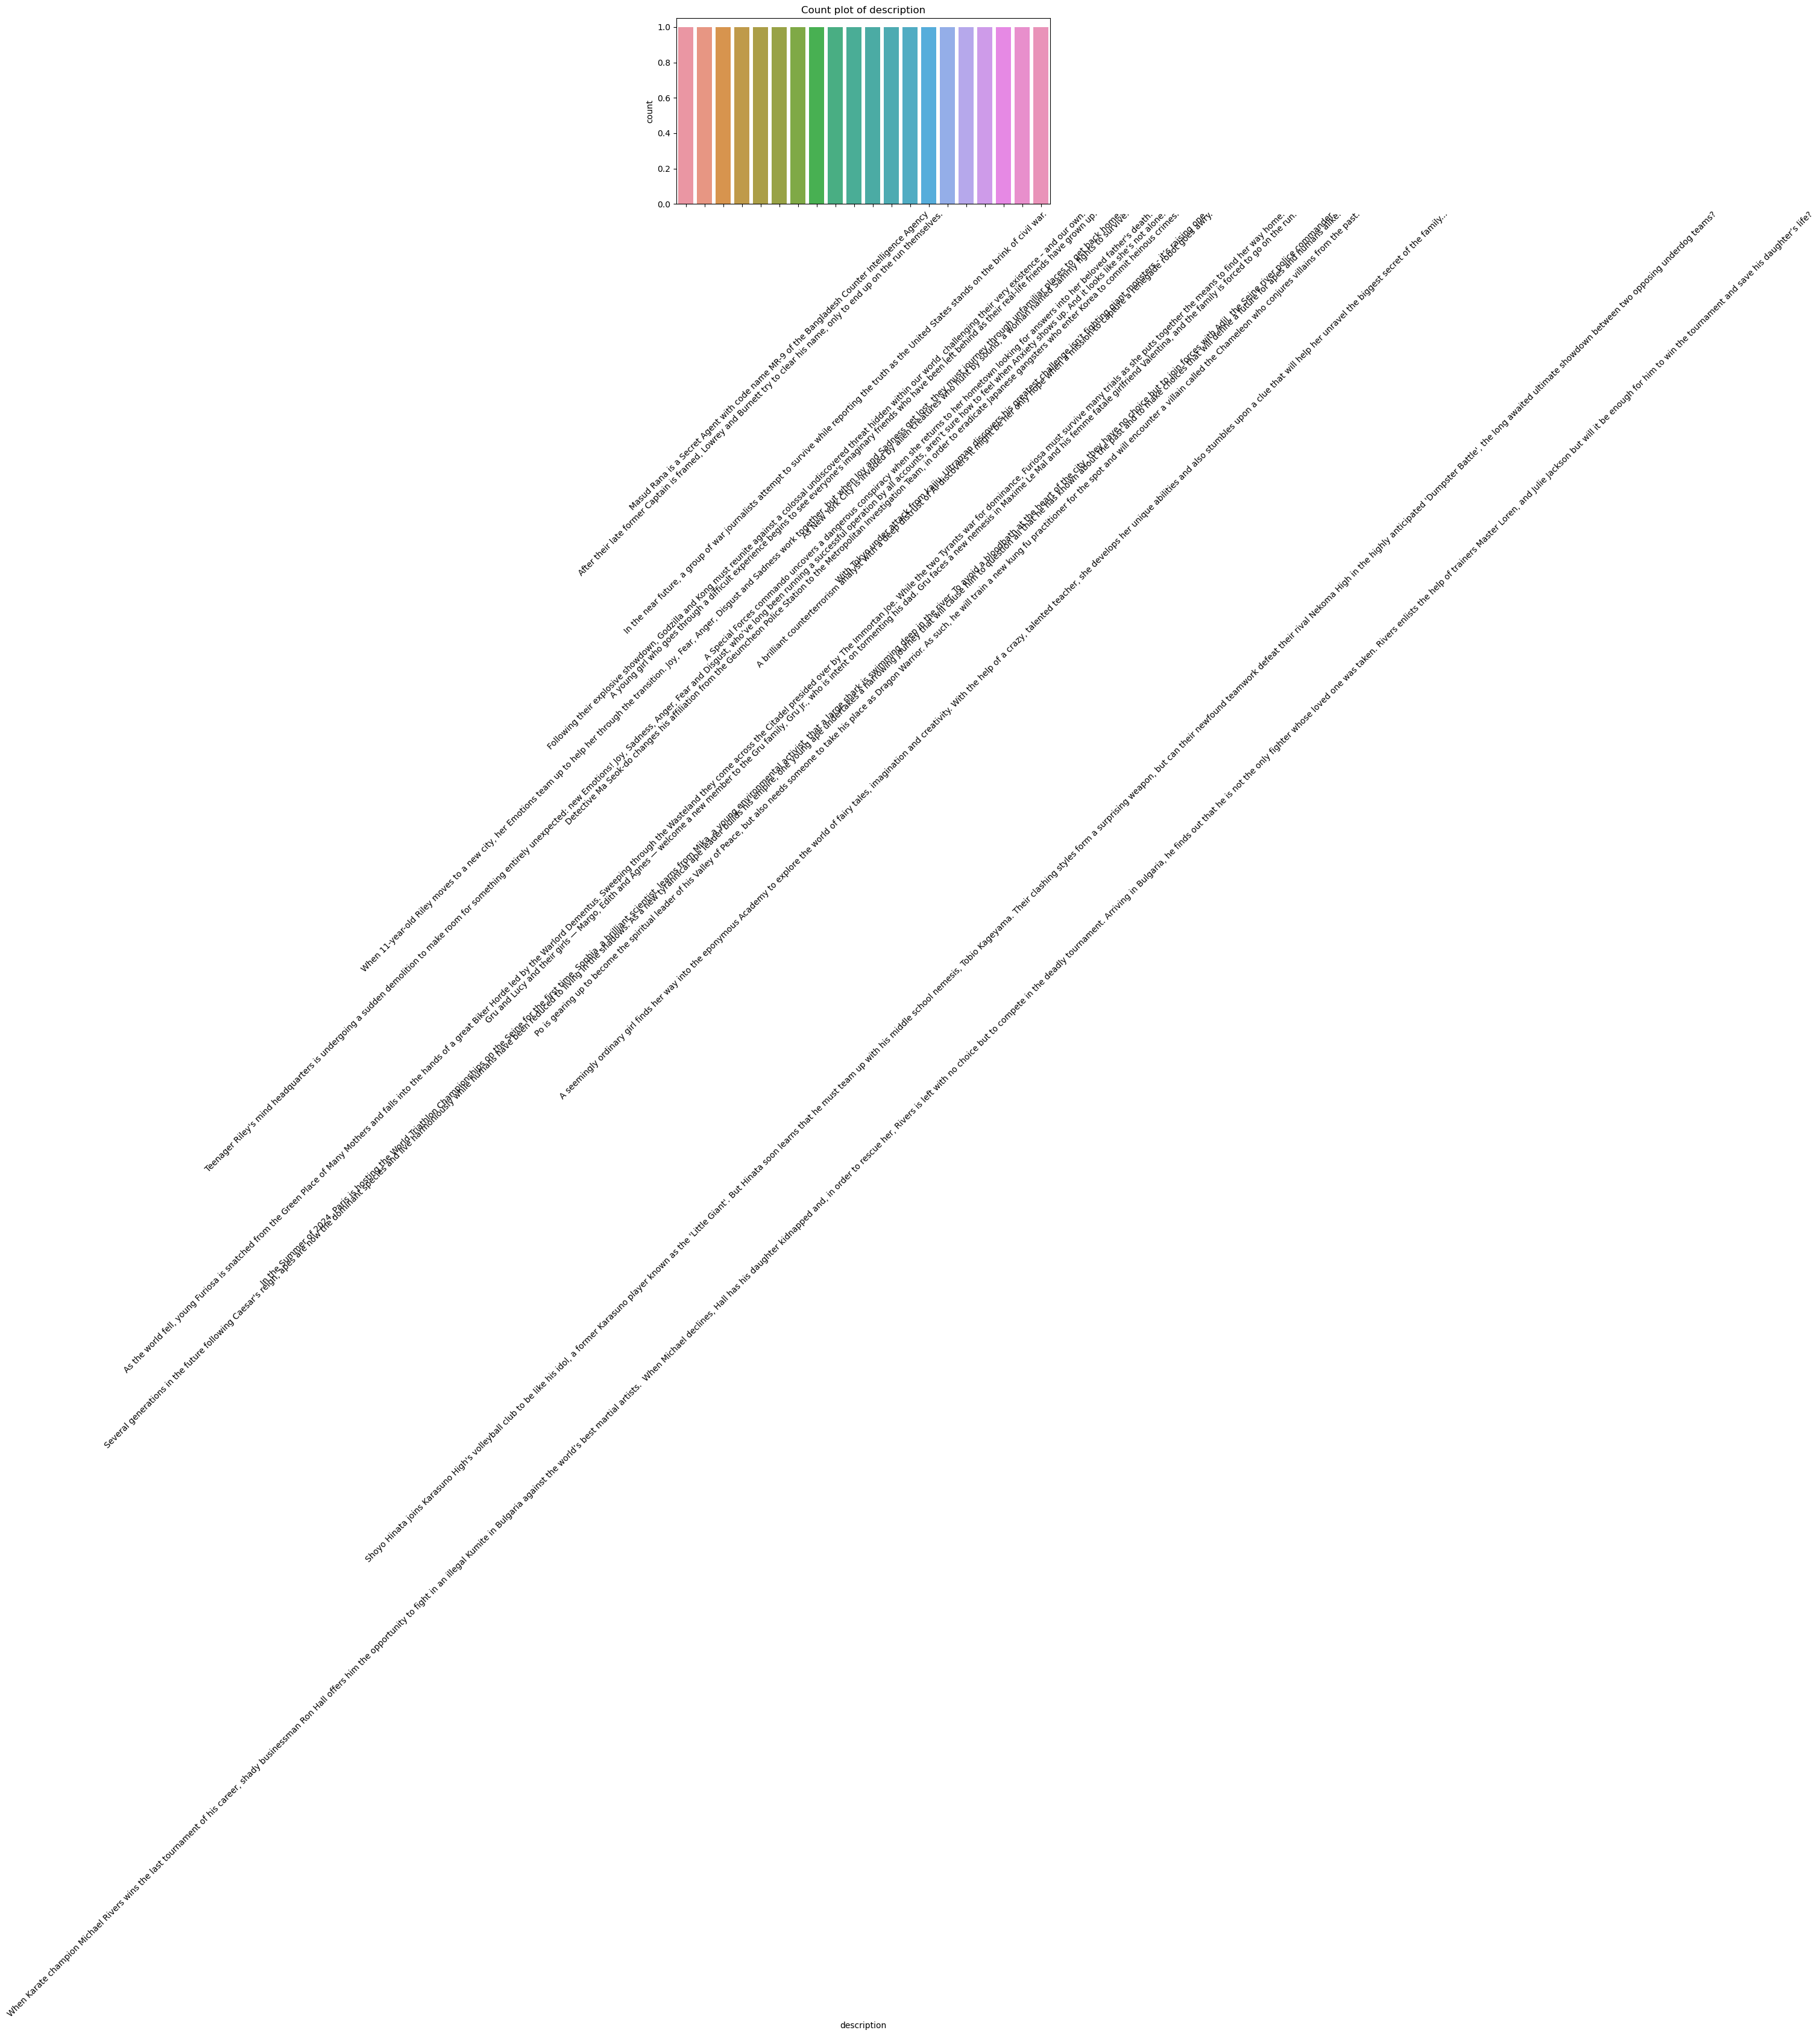

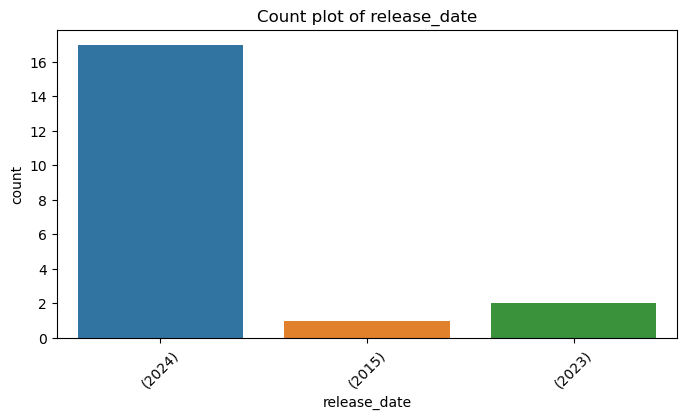

In [39]:
# Count plot for categorical features

categorical_cols = movies_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=movies_df, x=col)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


C:\Users\Vidisha\AppData\Local\Temp\ipykernel_15844\726541758.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movies_df.corr()


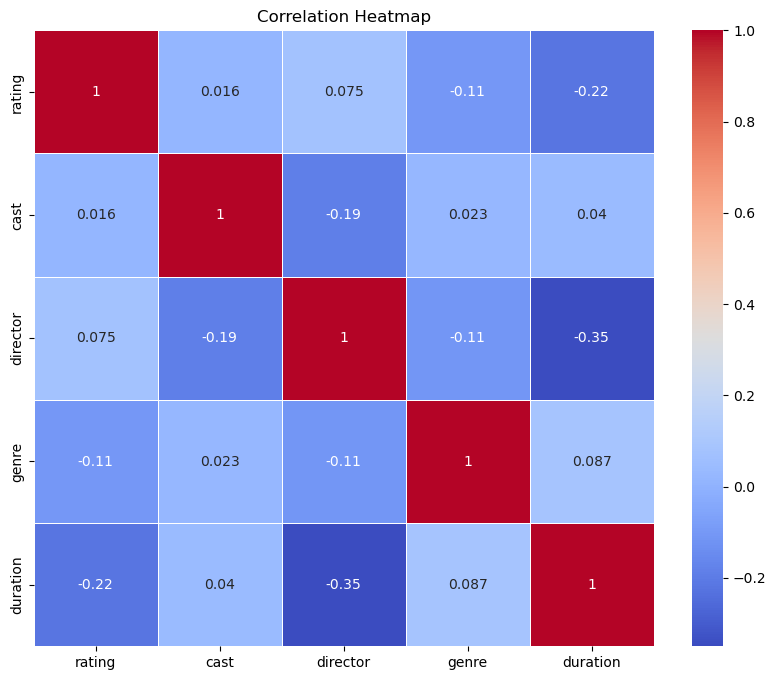

In [40]:
# Correlation heatmap for numerical features

corr_matrix = movies_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
